In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load the dataset
data = pd.read_csv('loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


This data contains loan application info which contains various relevant information e.g. income, job, loan amount, loan terms, borrower's assets, and loan approval status.
In this case, we will build up the logistic regression model to predict the loan approval ( Approved | Rejected ) based on borrower's information.

### Exploratory Data Analysis

In [3]:
# count the values
data[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [4]:
data.shape

(4269, 13)

### Data Preprocessing

In [5]:
# listed the numeric and non-numeric column
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

print(f'numeric_columns: {numeric_columns}')
print(f'non_numeric_columns: {non_numeric_columns}')

numeric_columns: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
non_numeric_columns: [' education', ' self_employed', ' loan_status']


In [6]:
# explore the non-numeric columns
for col in non_numeric_columns:
    print(f'{col}.unique(): {data[col].unique()}')

 education.unique(): [' Graduate' ' Not Graduate']
 self_employed.unique(): [' No' ' Yes']
 loan_status.unique(): [' Approved' ' Rejected']


In [7]:
# preprocess the non-numerical data by convert it into binary values
# education
data[' education'] = data[' education'].replace({' Graduate':1, ' Not Graduate':0})

# self_employed
data[' self_employed'] = data[' self_employed'].replace({' Yes':1, ' No':0})

# loan_status
data[' loan_status'] = data[' loan_status'].replace({' Approved':1, ' Rejected':0})

C:\Users\abejr\AppData\Local\Temp\ipykernel_21712\1452900936.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[' education'] = data[' education'].replace({' Graduate':1, ' Not Graduate':0})
C:\Users\abejr\AppData\Local\Temp\ipykernel_21712\1452900936.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[' self_employed'] = data[' self_employed'].replace({' Yes':1, ' No':0})
C:\Users\abejr\AppData\Local\Temp\ipykernel_21712\1452900936.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

### Data Partition

In [8]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
# define the dependent(x) and independent(y) columns
x_col = ['loan_id', ' no_of_dependents', ' education', ' self_employed',
         ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
         ' residential_assets_value', ' commercial_assets_value',
         ' luxury_assets_value', ' bank_asset_value', ' loan_status']

y_col = ' loan_status'

In [10]:
# build up train_test_split data
x = data[x_col]

y = data[' loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=24)

In [11]:
# developd a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# predict, and evaluate the model
y_pred = model.predict(x_test)
print(f'Prediction Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)} % \n')
print('Classification report is as follows: \n', classification_report(y_test, y_pred))

Prediction Accuracy: 78.45 % 

Classification report is as follows: 
               precision    recall  f1-score   support

           0       0.80      0.60      0.68       499
           1       0.78      0.90      0.84       782

    accuracy                           0.78      1281
   macro avg       0.79      0.75      0.76      1281
weighted avg       0.79      0.78      0.78      1281



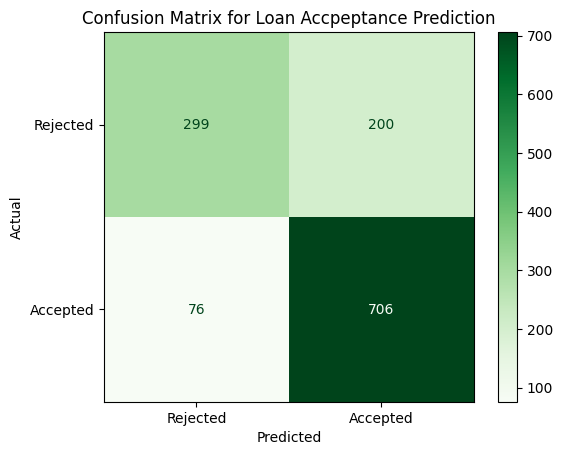

In [13]:
# Generate Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Accepted'])

# plot the confusion matrix
display.plot(cmap='Greens')
plt.title("Confusion Matrix for Loan Accpeptance Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Optimize the Model
As you could see, that our machine learning model got 78% accuracy without fine-tuing the training model. Then, we will try to fine-tune the parameter of each model to optimize the model accuracy.

Besides of Logistic Regression model, we will build up another 5 model as follows:
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.675674 (0.049059)
LDA: 0.921688 (0.011989)
KNN: 0.574623 (0.027481)
CART: 1.000000 (0.000000)
NB: 0.751333 (0.015705)
SVM: 0.627176 (0.001505)


In [20]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

C:\Users\abejr\AppData\Local\Temp\ipykernel_21712\2952673687.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


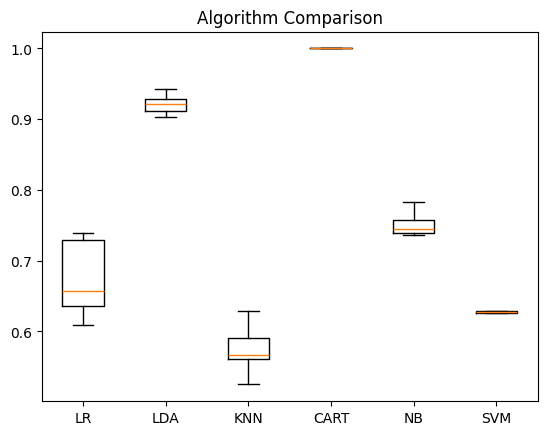

In [19]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [44]:
# build up KNN model
results = []
for i in range(1,51):
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(KNeighborsClassifier(n_neighbors=i), x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results.mean())

print(results)

[np.float64(0.5481908374671725), np.float64(0.4922897353594757), np.float64(0.5612354380373056), np.float64(0.520729052097596), np.float64(0.5746234652420821), np.float64(0.5378184552535296), np.float64(0.5806569998428767), np.float64(0.5465051289533344), np.float64(0.582318017552917), np.float64(0.5545419855895491), np.float64(0.5839981145204373), np.float64(0.5589122578617763), np.float64(0.5779836591771228), np.float64(0.5632544724024152), np.float64(0.5833348297456846), np.float64(0.5756369105070595), np.float64(0.5950472492199951), np.float64(0.5870126372023075), np.float64(0.5937049673408004), np.float64(0.5886837556957195), np.float64(0.5973883863437408), np.float64(0.592699378240668), np.float64(0.601741823977015), np.float64(0.5967183677134071), np.float64(0.6057563242127), np.float64(0.5987261789858814), np.float64(0.6074263203968486), np.float64(0.6013983973423717), np.float64(0.609770824448385), np.float64(0.6027406792215663), np.float64(0.609438620906377), np.float64(0.604

In [48]:
len(results)

50

In [45]:
print(max(results))
print(results.index(max(results)))

0.6171365401450023
48


This results means \
The original KNN model accuracy = 57.4623% (n_neighbors = 5) \
The optimized KNN model accuracy = 61.4121% (n_neighbors = 49)